## CS5344 Project

### Data preprocessing

In [1]:
from src.utils import *
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
# from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)
df.head()

df.columns = ['label', 'id', 'date', 'query', 'user', 'text']
print(np.unique(df['label']))
print(np.unique(df['query']))
df = df[['text', 'label']]
df['label'][df['label'] == 4] = 1
print(np.sum(df.isnull().any(axis=1)))

[0 4]
['NO_QUERY']
0


- Removing Hashtags, Mentions, Hyperlinks
- Removeing Non-alphabetic characters
- Removing Stopwords
- Stemming
- Lemmatization

In [3]:
%%time
df = preprocess(df)

CPU times: total: 7min 7s
Wall time: 7min 40s


#### Train/Test Split

In [4]:
X, y = df['text'].to_numpy(), df['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### TF-IDF Vectorizing

In [5]:
%%time
vectoriser=TfidfVectorizer(max_features = 3000)
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_train.shape

CPU times: total: 29.8 s
Wall time: 30.5 s


(1280000, 3000)

### Model 1 SVM

              precision    recall  f1-score   support

           0       0.78      0.73      0.76    159815
           1       0.75      0.79      0.77    160185

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

CPU times: total: 33.4 s
Wall time: 33.9 s


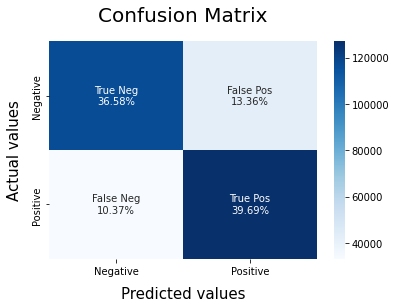

In [6]:
%%time
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
model_evaluation(model_svm, X_test, y_test)

### Model 2 Naive Bayes

              precision    recall  f1-score   support

           0       0.77      0.73      0.75    159815
           1       0.75      0.78      0.76    160185

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

CPU times: total: 2.22 s
Wall time: 16.5 s


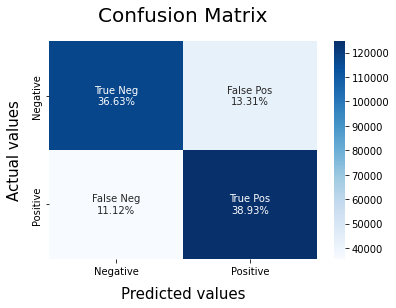

In [7]:
%%time

params_nb = {'alpha':list(range(1, 10))}
nb = BernoulliNB()

model_nb = GridSearchCV(nb, param_grid=params_nb, n_jobs=-1, cv=5)

model_nb.fit(X_train, y_train)
model_evaluation(model_nb, X_test, y_test)

### Model 3 Random Forest

              precision    recall  f1-score   support

           0       0.78      0.62      0.69    159815
           1       0.69      0.83      0.75    160185

    accuracy                           0.73    320000
   macro avg       0.74      0.73      0.72    320000
weighted avg       0.74      0.73      0.72    320000

CPU times: total: 23min 41s
Wall time: 24min 9s


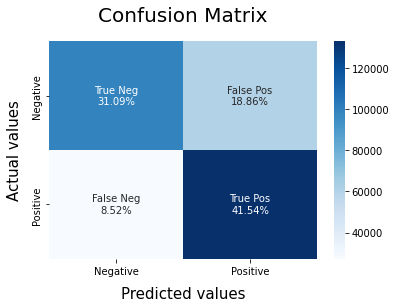

In [8]:
%%time

model_rf = RandomForestClassifier(n_estimators = 80, max_depth = 50)

# model_rf = GridSearchCV(rf, param_grid=param_grid_rf, n_jobs=-1, cv=5)
model_rf.fit(X_train, y_train)

model_evaluation(model_rf, X_test, y_test)

In [9]:
# save model
import joblib
knn_model_file = "models/best_RandomForestClassifier.pkl"
joblib.dump(model_rf, knn_model_file)
# load model
ld_model_knn = joblib.load(knn_model_file)